<a href="https://colab.research.google.com/github/SurinSeong/FinalPJT/blob/main/annotation_wrinkle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주름 등급 분포 파악

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.2 MB/s eta 0:00:00


<Axes: title={'center': '한글'}>

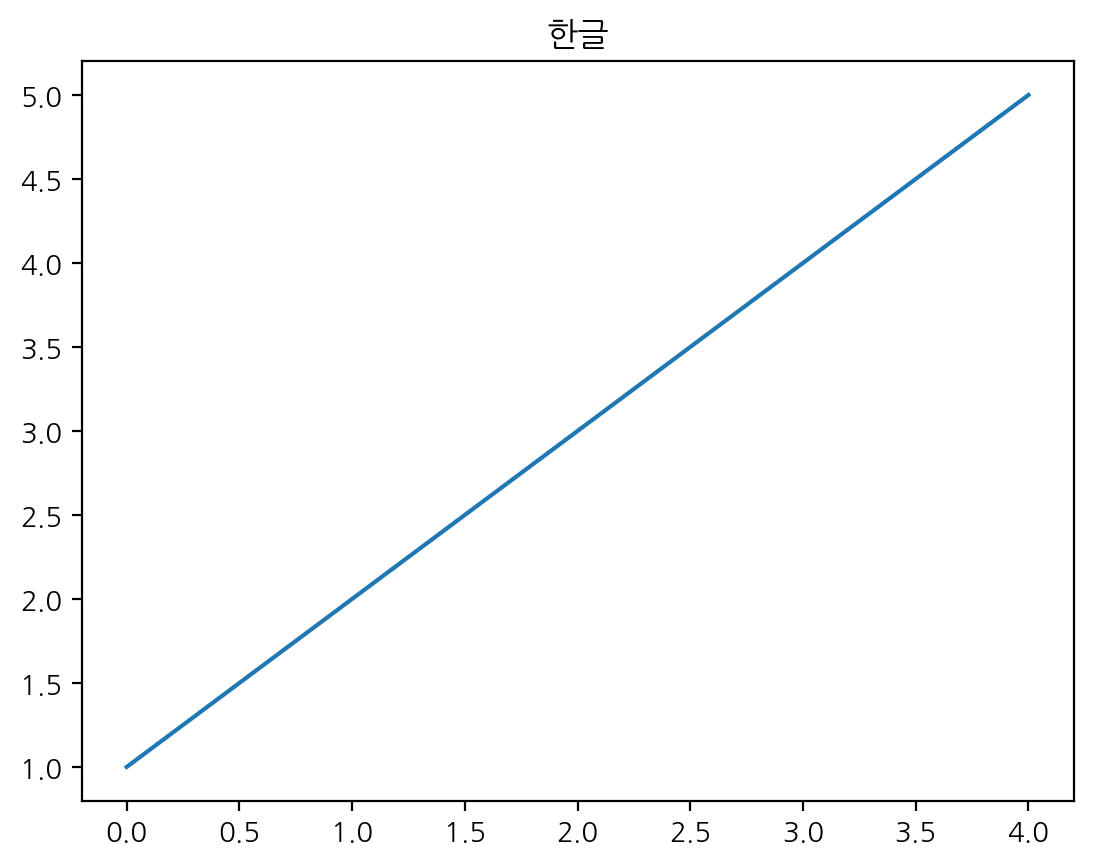

In [14]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
pd.Series([1, 2, 3, 4, 5]).plot(title='한글')

In [3]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/finalPJT/Final_project_2조/02_2. 전처리 및 EDA_이미지/data/'

In [4]:
# 분류 csv 가져오기 #
annotation_raw = pd.read_csv(folder_path+'annotation_data.csv', index_col=0).reset_index(drop=True)
annotation = annotation_raw.copy()
print(annotation.shape)
annotation.head(2)

(2895, 14)


,ID,location,acne,chin_sagging,r_cheek_pore,r_cheek_pigmentation,forehead_wrinkle,r_perocular_wrinkle,l_cheek_pore,glabellus_wrinkle,lip_dryness,forehead_pigmentation,l_cheek_pigmentation,l_perocular_wrinkle
0,1,L,NaN,1.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0
1,1,F,NaN,1.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0


In [5]:
## location 사용하지 않기 때문에 버리기
annotation = annotation.drop(columns='location')

# ID를 기준으로 그룹화해서 평균치 내기
annotation = annotation.groupby('ID').mean().reset_index()

In [6]:
annotation.head(2)

,ID,acne,chin_sagging,r_cheek_pore,r_cheek_pigmentation,forehead_wrinkle,r_perocular_wrinkle,l_cheek_pore,glabellus_wrinkle,lip_dryness,forehead_pigmentation,l_cheek_pigmentation,l_perocular_wrinkle
0,1,NaN,1.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,3.0
1,2,NaN,0.0,2.0,3.0,1.0,3.0,2.0,1.0,2.0,1.0,3.0,3.0


In [7]:
# 측정 csv 가져오기 #
measurement_raw = pd.read_csv(folder_path+'measurement_data.csv', index_col=0)
measurement = measurement_raw.copy()
print(measurement.shape)
measurement.head(2)

(1072, 80)


,ID,수분_이마,수분_오른쪽볼,수분_왼쪽볼,수분_턱,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,...,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv,스팟개수_정면,모공개수_오른쪽볼,모공개수_왼쪽볼
0,1,53.0,76.33,71.67,78.67,0.204,0.083,0.5931,0.243,0.123,...,15.760,95.142,41.774,98.502,70.769,46.387,52.115,147,608,629
1,2,75.0,64.00,63.00,66.00,0.279,0.088,0.6846,0.322,0.152,...,18.147,116.790,47.082,122.940,84.142,54.029,68.907,158,691,631


In [8]:
def keyword_df(df, keyword):
    # keyword가 포함된 컬럼명 필터링
    keyword_columns = [col for col in df.columns if keyword in col]

    # 필터링된 컬럼들로 새로운 데이터프레임 생성
    filtered_df = df[['ID'] + keyword_columns]

    return filtered_df

## 왼쪽 눈가 주름

In [9]:
l_perocular_wrinkle = annotation[['ID', 'l_perocular_wrinkle']].merge(keyword_df(measurement, '왼쪽눈가'), on='ID')
print(l_perocular_wrinkle.shape)
l_perocular_wrinkle.head(2)

(965, 10)


,ID,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
0,1,3.0,14.581,18.517,121.23,48.491,127.28,86.372,58.520,68.764
1,2,3.0,15.440,19.504,122.92,49.631,127.85,89.604,58.363,69.486


In [11]:
l_perocular_wrinkle.iloc[:, 1:].groupby('l_perocular_wrinkle').mean()

,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
l_perocular_wrinkle,,,,,,,,
0.0,17.818368,22.424397,134.836912,57.900779,142.874721,102.947574,67.722926,75.151721
1.0,19.477790,24.558439,148.152788,62.896414,157.420296,112.337305,74.040262,83.380150
2.0,21.360469,26.876503,161.078580,68.505308,170.228951,121.236783,78.380559,91.847895
3.0,22.325035,28.007715,166.926007,71.377639,175.774729,124.727500,79.056833,96.718396
4.0,24.360652,30.488326,181.029438,77.039360,190.000787,134.123225,84.480315,105.520191
5.0,24.193384,30.262697,181.170889,75.501333,189.869697,132.047545,83.678232,106.191192
6.0,27.746921,34.744218,213.370693,85.854574,222.865743,150.395337,96.228515,126.637149


<Figure size 1000x500 with 0 Axes>

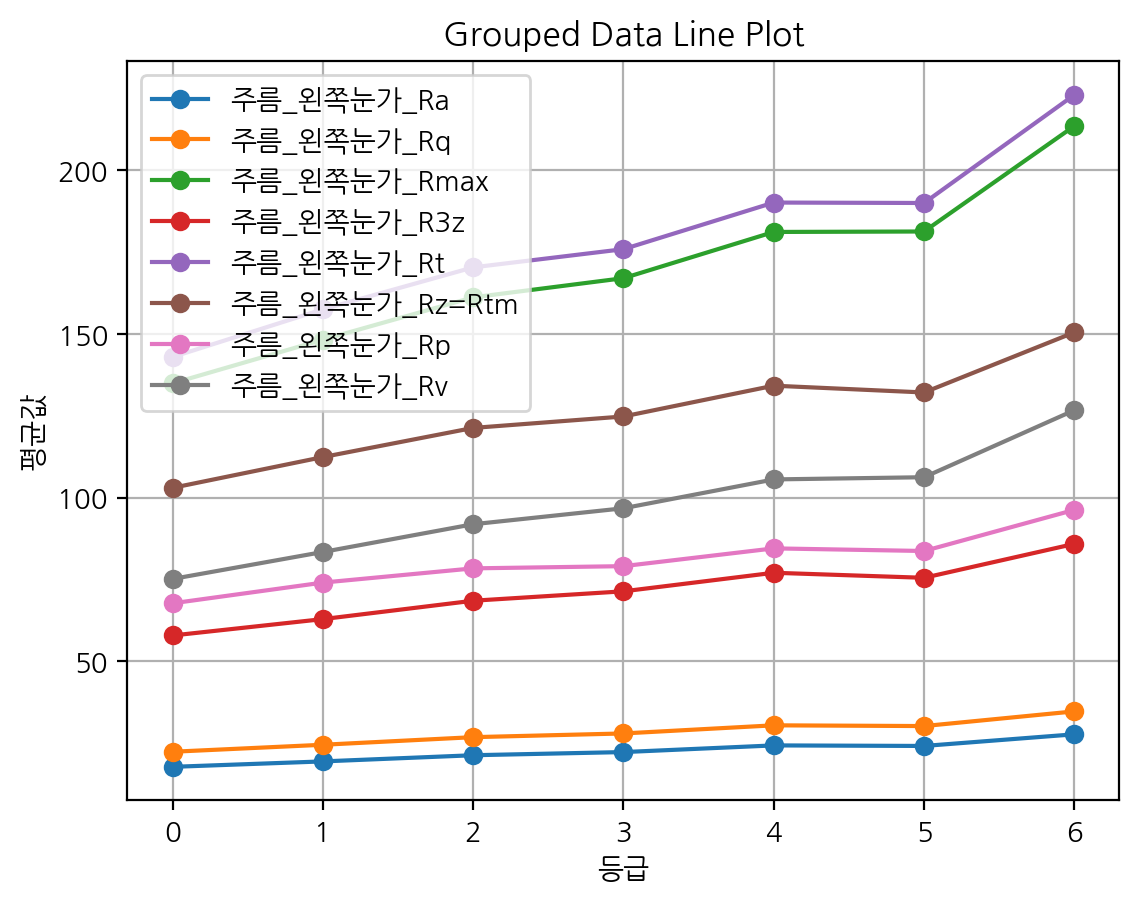

In [21]:
# 선그래프로 시각화
data = l_perocular_wrinkle.iloc[:, 1:].groupby('l_perocular_wrinkle').mean()

# 선그래프 그리기
plt.figure(figsize=(10, 5))
data.plot(kind='line', marker='o', legend=True)

# 그래프 설정
plt.title('Grouped Data Line Plot')
plt.xlabel('등급')
plt.ylabel('평균값')
plt.grid(True)
plt.show()

In [56]:
l_perocular_wrinkle.groupby('l_perocular_wrinkle')['ID'].count()

,ID
l_perocular_wrinkle,
0.0,68
1.0,321
2.0,143
3.0,144
4.0,89
5.0,99
6.0,101


### 전체 정규화
* MinMax
* Standard
* np.normalize()

In [39]:
## 전체 정규화하기
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # standard = StandardScaler()
# minmax = MinMaxScaler()

# minmax_data = minmax.fit_transform(l_perocular_wrinkle.iloc[:, 2:])

# 정규화된 값으로 df 그리기 함수
def scaled_df(df, scaler):
    # 정규화
    scaled_data = scaler.fit_transform(df.iloc[:, 2:])
    scaled_raw = pd.DataFrame(data=scaled_data, columns=df.columns[2:])
    # 합쳐서 반환
    return pd.concat([df.iloc[:, :2], scaled_raw], axis=1)

In [41]:
# MinMaxScaler 이용
minmax_l_perocular_wrinkle = scaled_df(l_perocular_wrinkle, MinMaxScaler())
print(minmax_l_perocular_wrinkle.shape)
minmax_l_perocular_wrinkle.head(2)

(965, 10)


,ID,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
0,1,3.0,0.127195,0.129289,0.112206,0.126867,0.113669,0.142019,0.117029,0.126619
1,2,3.0,0.150982,0.151014,0.117003,0.136032,0.115211,0.159875,0.116056,0.130024


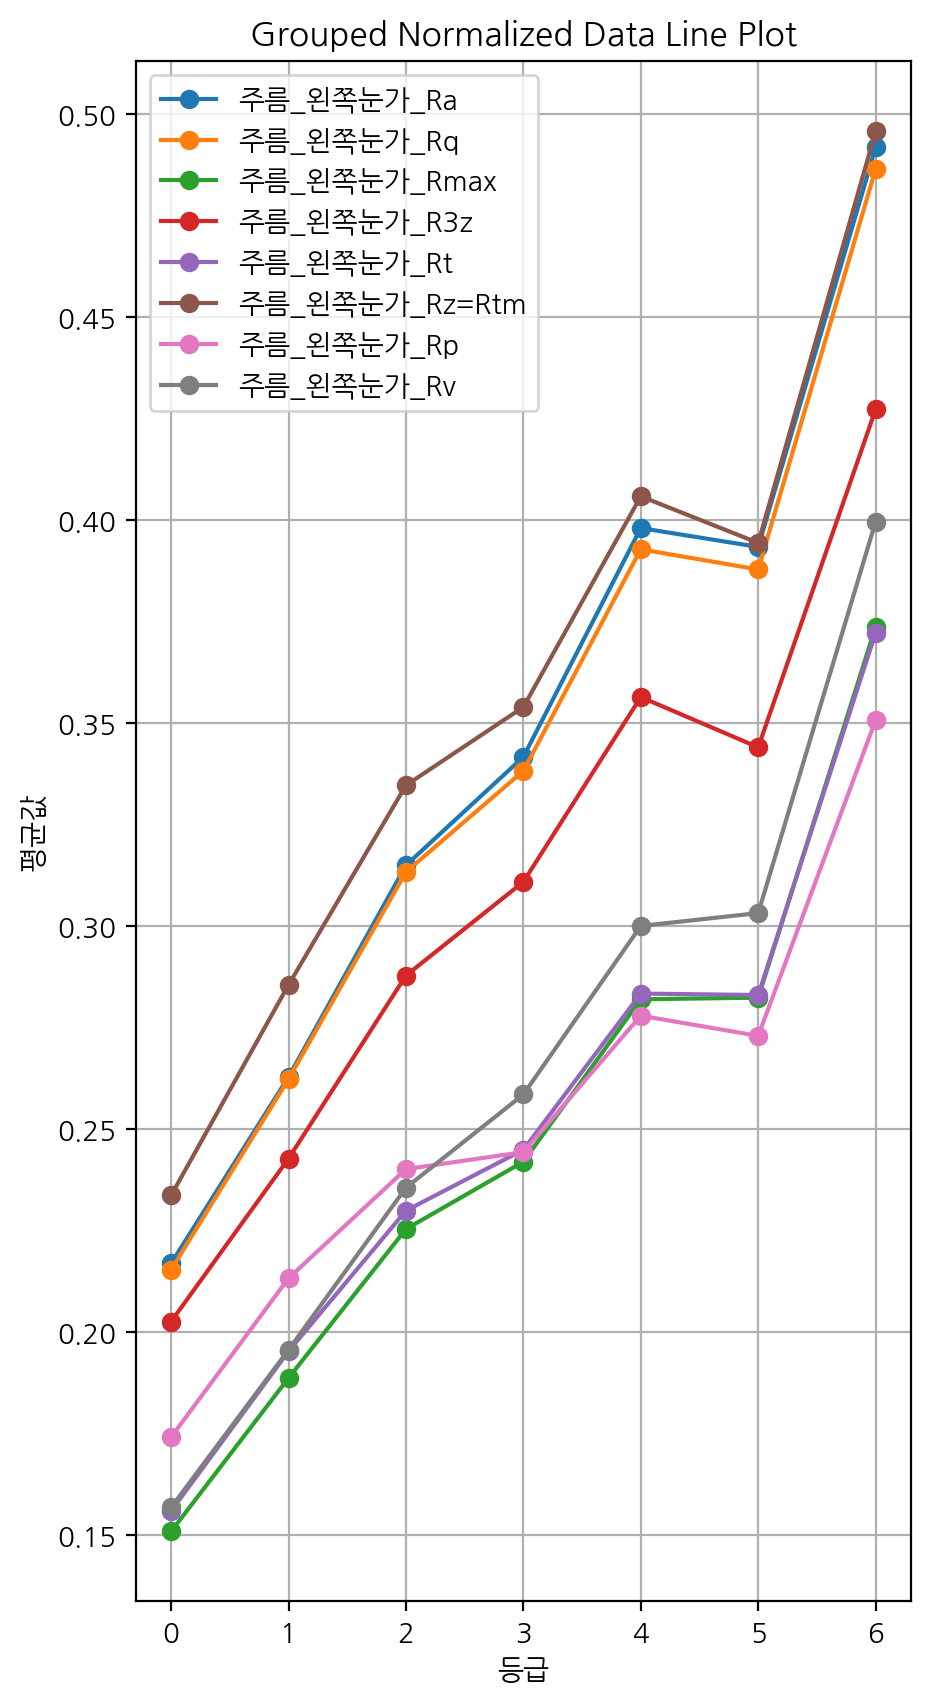

In [32]:
# 선그래프로 시각화
data = minmax_l_perocular_wrinkle.iloc[:, 1:].groupby('l_perocular_wrinkle').mean()

# 선그래프 그리기
# plt.figure(figsize=(5, 10))
data.plot(kind='line', marker='o', legend=True, figsize=(5, 10))

# 그래프 설정
plt.title('Grouped Normalized Data Line Plot')
plt.xlabel('등급')
plt.ylabel('평균값')
plt.grid(True)
plt.show()

In [29]:
minmax_l_perocular_wrinkle.iloc[:, 1:].groupby('l_perocular_wrinkle').agg(['mean', 'median'])

주름_왼쪽눈가_Ra           주름_왼쪽눈가_Rq           주름_왼쪽눈가_Rmax  \
                          mean    median       mean    median         mean   
l_perocular_wrinkle                                                          
0.0                   0.216842  0.202169   0.215293  0.198644     0.150825   
1.0                   0.262794  0.251751   0.262264  0.251689     0.188619   
2.0                   0.314928  0.300238   0.313286  0.299210     0.225305   
3.0                   0.341638  0.317546   0.338184  0.319118     0.241901   
4.0                   0.398007  0.370851   0.392783  0.367376     0.281930   
5.0                   0.393375  0.378162   0.387817  0.373385     0.282331   
6.0                   0.491778  0.488263   0.486457  0.473224     0.373721   

                              주름_왼쪽눈가_R3z           주름_왼쪽눈가_Rt            \
                       median        mean    median       mean    median   
l_perocular_wrinkle                                                        
0.0                  0.137367    0.202515  0.191052   0.155854  0.141045   
1.0                  0.180664    0.242676  0.235919   0.195202  0.186410   
2.0                  0.213360    0.287767  0.265978   0.229851  0.218222   
3.0                  0.227537    0.310858  0.295510   0.244853  0.235413   
4.0                  0.278951    0.356374  0.339368   0.283336  0.279168   
5.0                  0.272764    0.344009  0.334223   0.282981  0.272946   
6.0                  0.361401    0.427242  0.418289   0.372239  0.355398   

                    주름_왼쪽눈가_Rz=Rtm           주름_왼쪽눈가_Rp           주름_왼쪽눈가_Rv  \
                              mean    median       mean    median       mean   
l_perocular_wrinkle                                                            
0.0                       0.233595  0.220813   0.174053  0.165679   0.156749   
1.0                       0.285471  0.275596   0.213197  0.207278   0.195563   
2.0                       0.334638  0.323275   0.240091  0.233990   0.235505   
3.0                       0.353923  0.341341   0.244281  0.239369   0.258480   
4.0                       0.405832  0.382168   0.277887  0.279341   0.299998   
5.0                       0.394364  0.380235   0.272917  0.264817   0.303163   
6.0                       0.495731  0.496254   0.350682  0.334754   0.399606   

                               
                       median  
l_perocular_wrinkle            
0.0                  0.132161  
1.0                  0.186949  
2.0                  0.226303  
3.0                  0.244612  
4.0                  0.291789  
5.0                  0.285374  
6.0                  0.378582

In [34]:
minmax_grade_list = {}

for grade, group in minmax_l_perocular_wrinkle.groupby('l_perocular_wrinkle'):
    minmax_grade_list[f'group_{int(grade)}'] = group

In [36]:
minmax_grade_list['group_0'].iloc[:, 2:].describe()

,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.216842,0.215293,0.150825,0.202515,0.155854,0.233595,0.174053,0.156749
std,0.110916,0.110916,0.086971,0.102519,0.087146,0.120995,0.088905,0.093382
min,0.041878,0.037770,0.004303,0.053975,0.005486,0.027038,0.005973,0.013750
25%,0.127839,0.127930,0.090884,0.127623,0.095200,0.141349,0.112432,0.085703
50%,0.202169,0.198644,0.137367,0.191052,0.141045,0.220813,0.165679,0.132161
75%,0.276486,0.281310,0.195004,0.245394,0.201937,0.301825,0.223529,0.201838
max,0.598198,0.594062,0.420493,0.561219,0.411583,0.607081,0.442706,0.421035


In [51]:
# 히스토그램 그리는 함수
def show_histogram(df, grade_col_name):
    # 데이터프레임 melt: 변수들을 하나의 열로 모으기
    df_melted = df.melt(id_vars=grade_col_name, var_name='Variable', value_name='Value')

    # FacetGrid를 이용한 히스토그램 그리기
    g = sns.FacetGrid(df_melted, col='Variable', hue=grade_col_name, col_wrap=2, height=4, aspect=1.5)
    g.map(sns.histplot, 'Value', kde=False, bins=40, alpha=0.7)

    # 그래프 설정
    g.add_legend(title=grade_col_name)
    plt.tight_layout()
    plt.show()


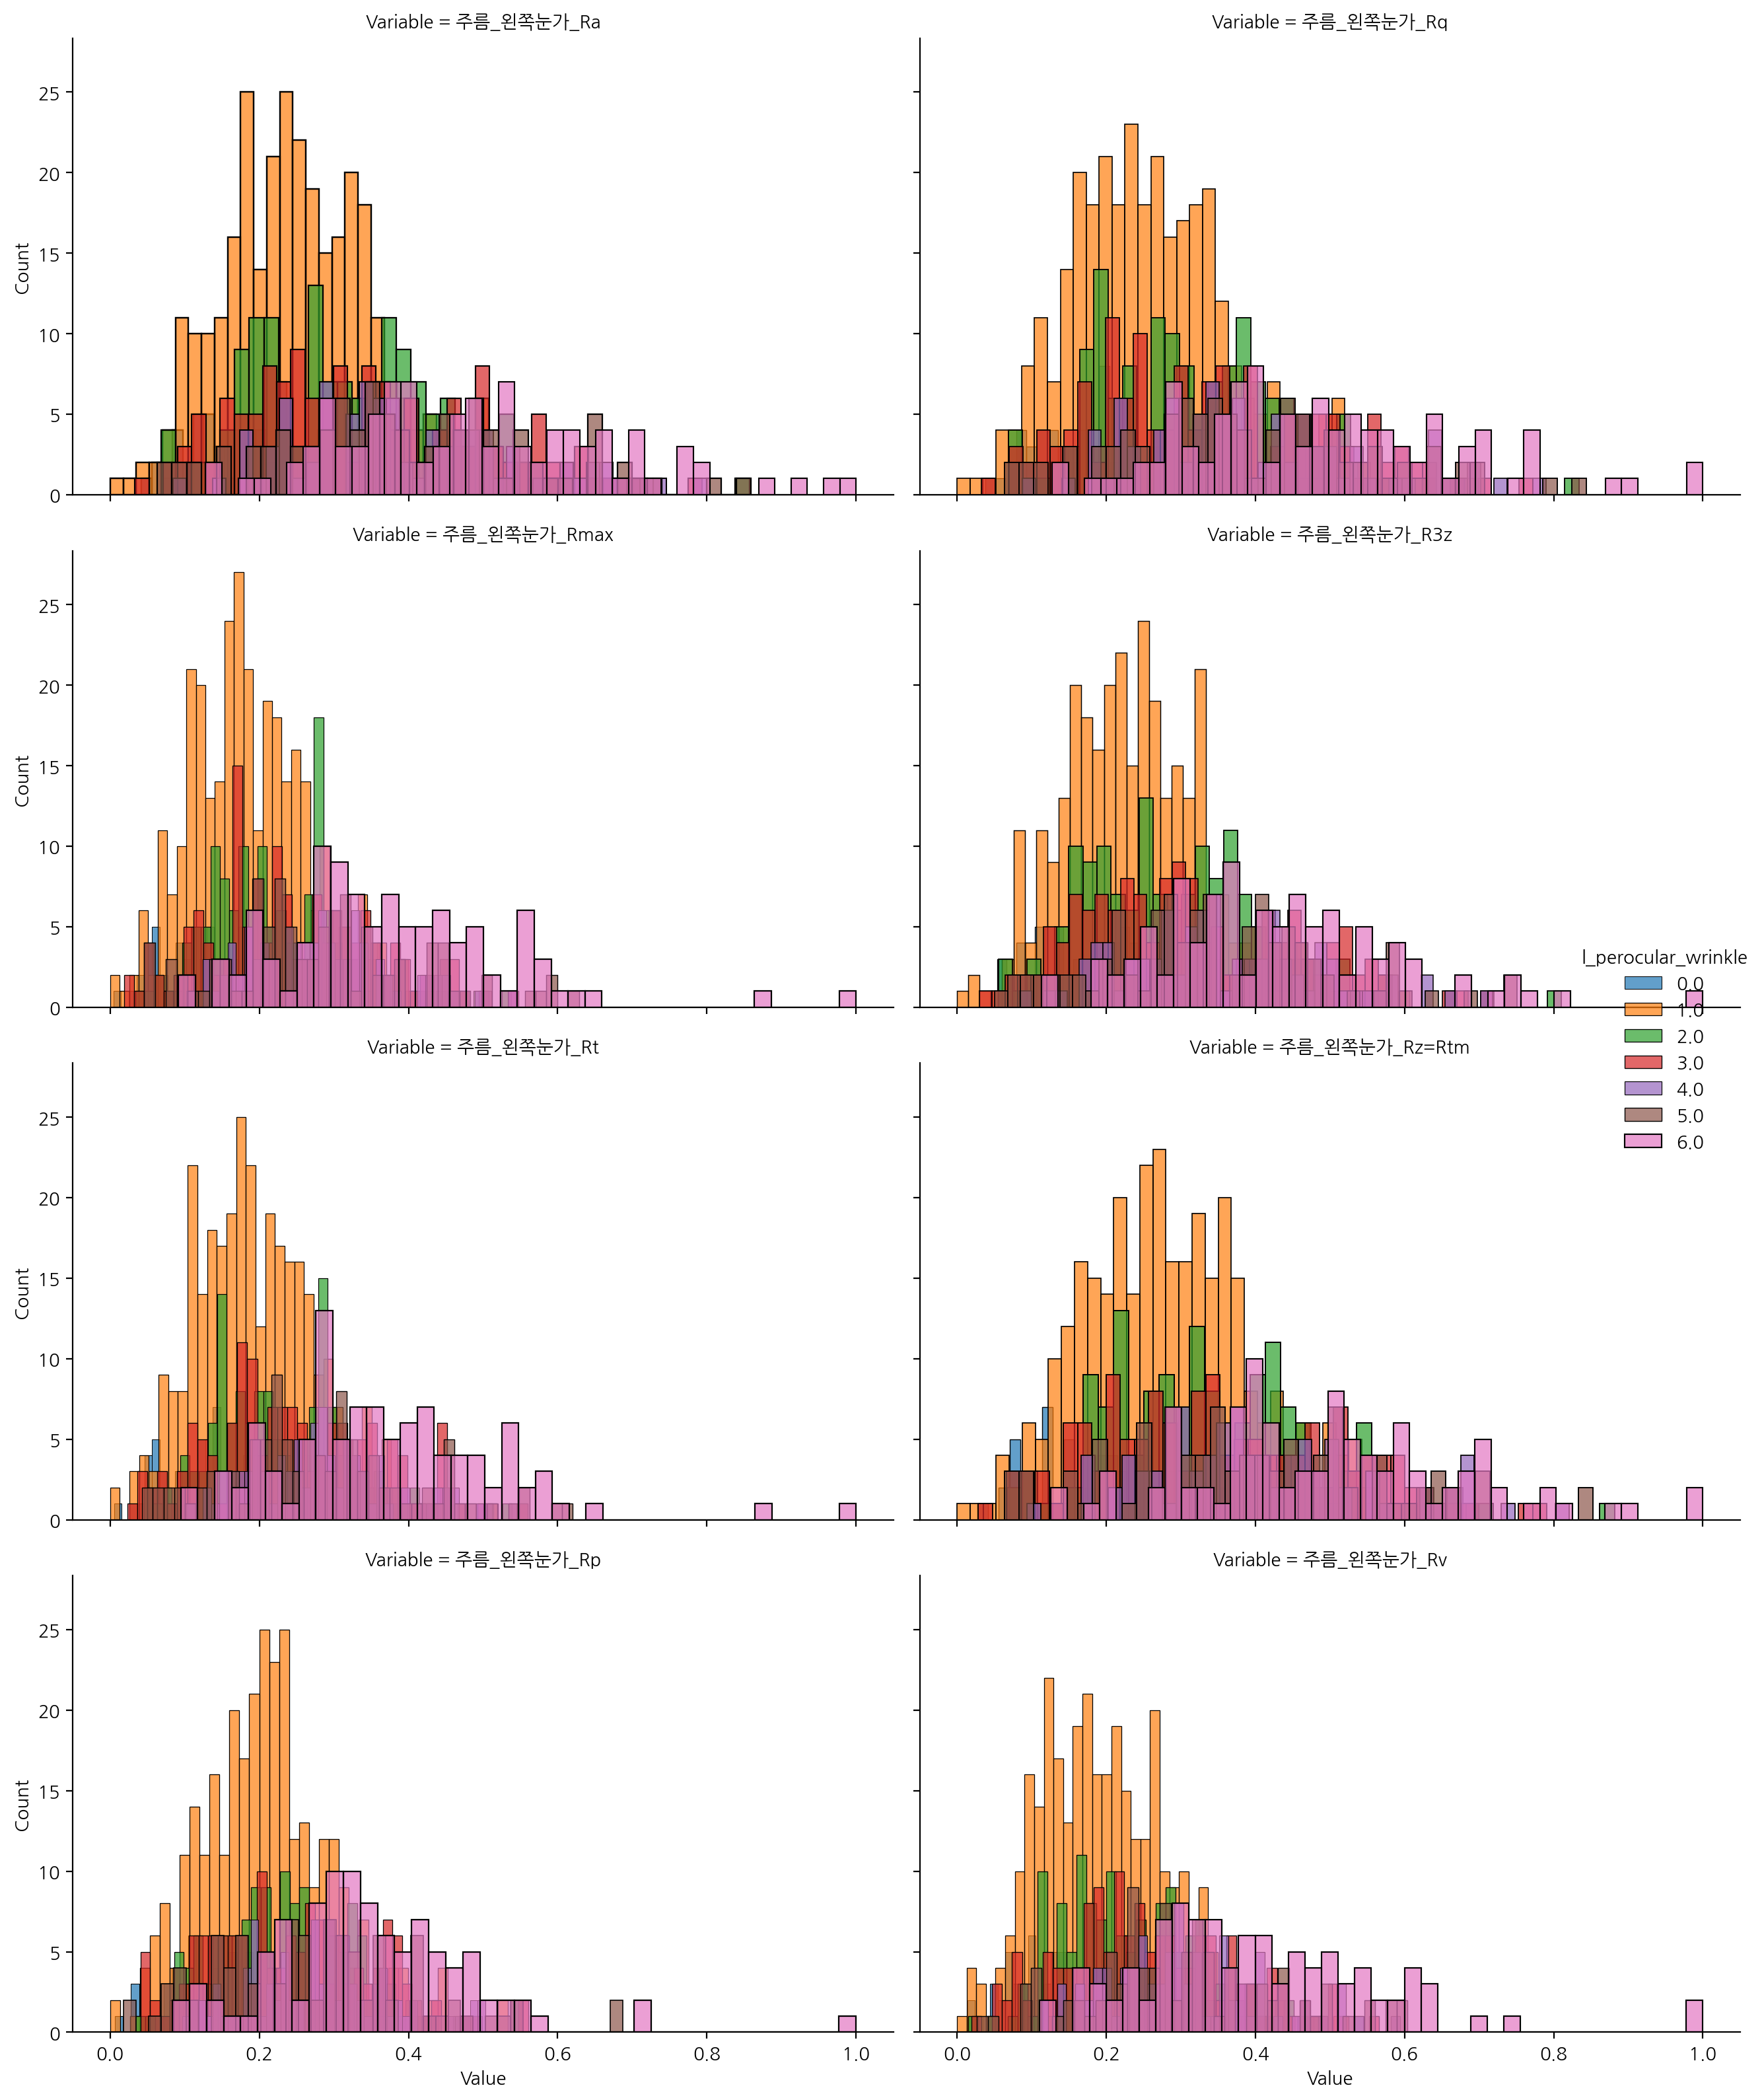

In [52]:
show_histogram(minmax_l_perocular_wrinkle.iloc[:, 1:], 'l_perocular_wrinkle')

In [57]:
## 상관관계 확인하기
minmax_l_perocular_wrinkle.iloc[:, 1:].corr(method='spearman')

,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
l_perocular_wrinkle,1.000000,0.462006,0.456939,0.466590,0.431290,0.453573,0.414958,0.355529,0.492946
주름_왼쪽눈가_Ra,0.462006,1.000000,0.999215,0.973138,0.987998,0.972036,0.990225,0.908817,0.938925
주름_왼쪽눈가_Rq,0.456939,0.999215,1.000000,0.977917,0.987581,0.977730,0.993762,0.912092,0.945797
주름_왼쪽눈가_Rmax,0.466590,0.973138,0.977917,1.000000,0.960186,0.996908,0.980448,0.928872,0.964431
주름_왼쪽눈가_R3z,0.431290,0.987998,0.987581,0.960186,1.000000,0.959629,0.983569,0.904399,0.921842
주름_왼쪽눈가_Rt,0.453573,0.972036,0.977730,0.996908,0.959629,1.000000,0.982410,0.934111,0.965519
주름_왼쪽눈가_Rz=Rtm,0.414958,0.990225,0.993762,0.980448,0.983569,0.982410,1.000000,0.922078,0.946233
주름_왼쪽눈가_Rp,0.355529,0.908817,0.912092,0.928872,0.904399,0.934111,0.922078,1.000000,0.813097
주름_왼쪽눈가_Rv,0.492946,0.938925,0.945797,0.964431,0.921842,0.965519,0.946233,0.813097,1.000000


<Axes: >

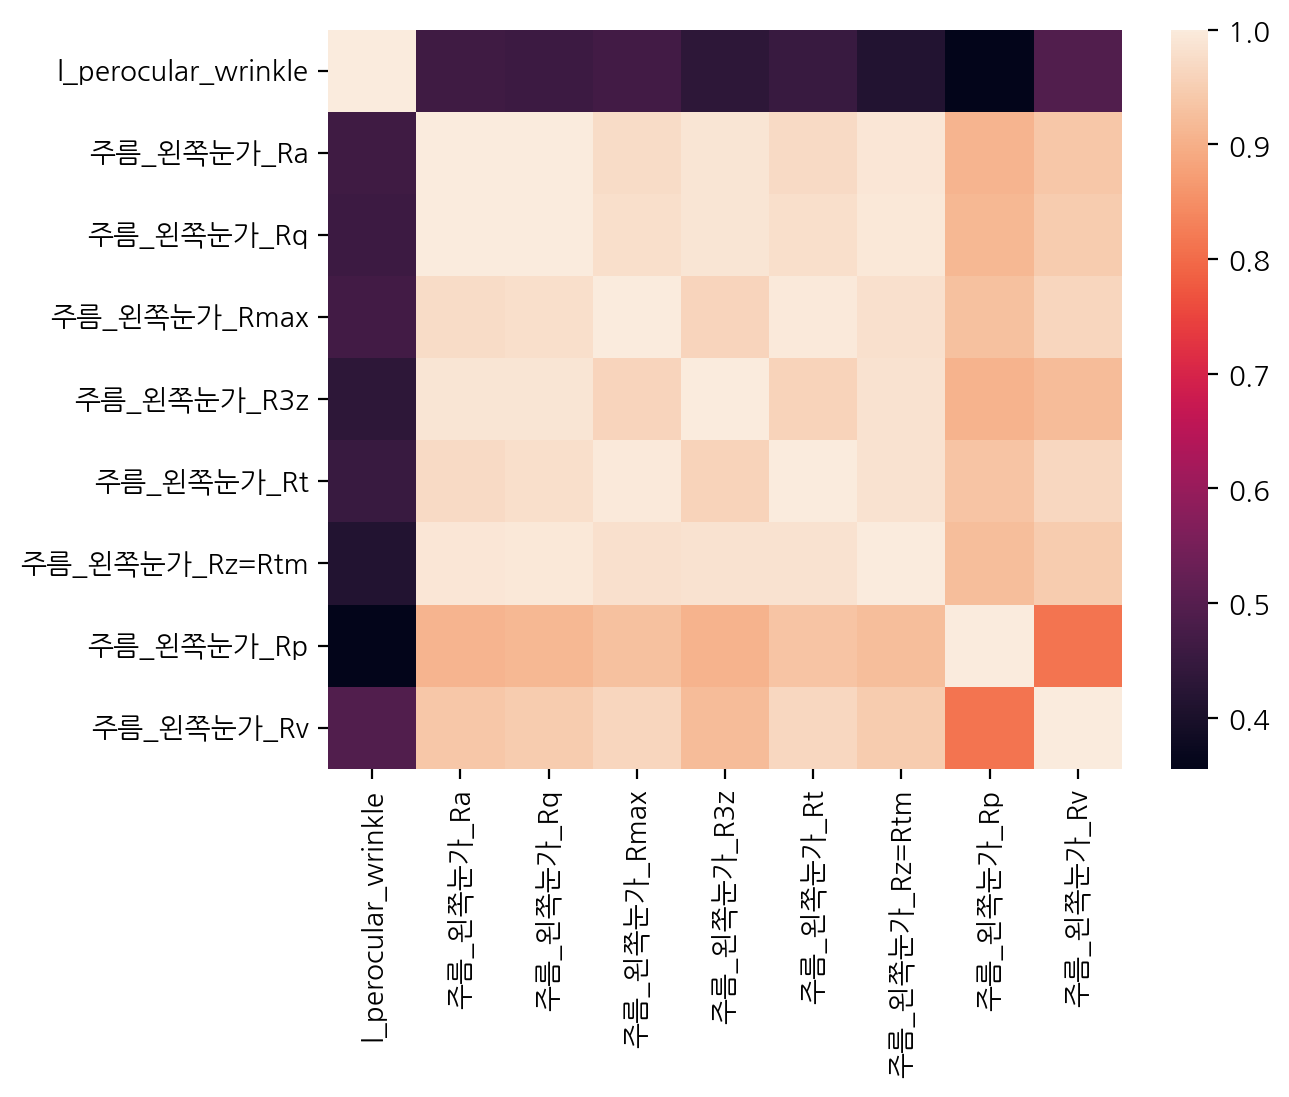

In [61]:
sns.heatmap(data=minmax_l_perocular_wrinkle.iloc[:, 1:].corr(method='spearman'))

In [62]:
# 의사결정나무 그리기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(minmax_l_perocular_wrinkle.iloc[:, 2:], minmax_l_perocular_wrinkle['l_perocular_wrinkle'])

DecisionTreeClassifier()

In [64]:
# 피처 중요도 출력
importance = model.feature_importances_
feature_names = minmax_l_perocular_wrinkle.columns[2:].tolist()

feature_importance_df = pd.DataFrame({'Feature': minmax_l_perocular_wrinkle.columns[2:], 'Importance': importance})
print(feature_importance_df)

          Feature  Importance
0      주름_왼쪽눈가_Ra    0.111704
1      주름_왼쪽눈가_Rq    0.090452
2    주름_왼쪽눈가_Rmax    0.174454
3     주름_왼쪽눈가_R3z    0.130292
4      주름_왼쪽눈가_Rt    0.096798
5  주름_왼쪽눈가_Rz=Rtm    0.152338
6      주름_왼쪽눈가_Rp    0.107741
7      주름_왼쪽눈가_Rv    0.136221


In [70]:
from sklearn.tree import export_text

# 트리 구조를 텍스트로 출력
tree_rules = export_text(model, feature_names=feature_names)
print(tree_rules)

|--- 주름_왼쪽눈가_Rmax <= 0.27
|   |--- 주름_왼쪽눈가_Rv <= 0.16
|   |   |--- 주름_왼쪽눈가_Rz=Rtm <= 0.12
|   |   |   |--- 주름_왼쪽눈가_Ra <= 0.11
|   |   |   |   |--- 주름_왼쪽눈가_Rmax <= 0.08
|   |   |   |   |   |--- 주름_왼쪽눈가_Rz=Rtm <= 0.09
|   |   |   |   |   |   |--- 주름_왼쪽눈가_Rmax <= 0.04
|   |   |   |   |   |   |   |--- 주름_왼쪽눈가_R3z <= 0.03
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- 주름_왼쪽눈가_R3z >  0.03
|   |   |   |   |   |   |   |   |--- 주름_왼쪽눈가_Rp <= 0.04
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- 주름_왼쪽눈가_Rp >  0.04
|   |   |   |   |   |   |   |   |   |--- 주름_왼쪽눈가_Rv <= 0.02
|   |   |   |   |   |   |   |   |   |   |--- 주름_왼쪽눈가_Rmax <= 0.03
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |   |   |   |--- 주름_왼쪽눈가_Rmax >  0.03
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- 주름_왼쪽눈가_Rv >  0.02
|   |   |   |   |   |   |   |   |   |   |---

## 오른쪽 눈가 주름

In [53]:
r_perocular_wrinkle = annotation[['ID', 'r_perocular_wrinkle']].merge(keyword_df(measurement, '오른쪽눈가'), on='ID')
print(r_perocular_wrinkle.shape)
r_perocular_wrinkle.head(2)

(965, 10)


,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
0,1,2.0,12.56,15.760,95.142,41.774,98.502,70.769,46.387,52.115
1,2,3.0,14.39,18.147,116.790,47.082,122.940,84.142,54.029,68.907


In [54]:
# MinMaxScaler 이용
minmax_r_perocular_wrinkle = scaled_df(r_perocular_wrinkle, MinMaxScaler())
print(minmax_r_perocular_wrinkle.shape)
minmax_r_perocular_wrinkle.head(2)

(965, 10)


,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
0,1,2.0,0.060822,0.057068,0.063919,0.083567,0.061541,0.055771,0.054915,0.064264
1,2,3.0,0.112712,0.108961,0.136807,0.135874,0.143481,0.129961,0.120050,0.153514


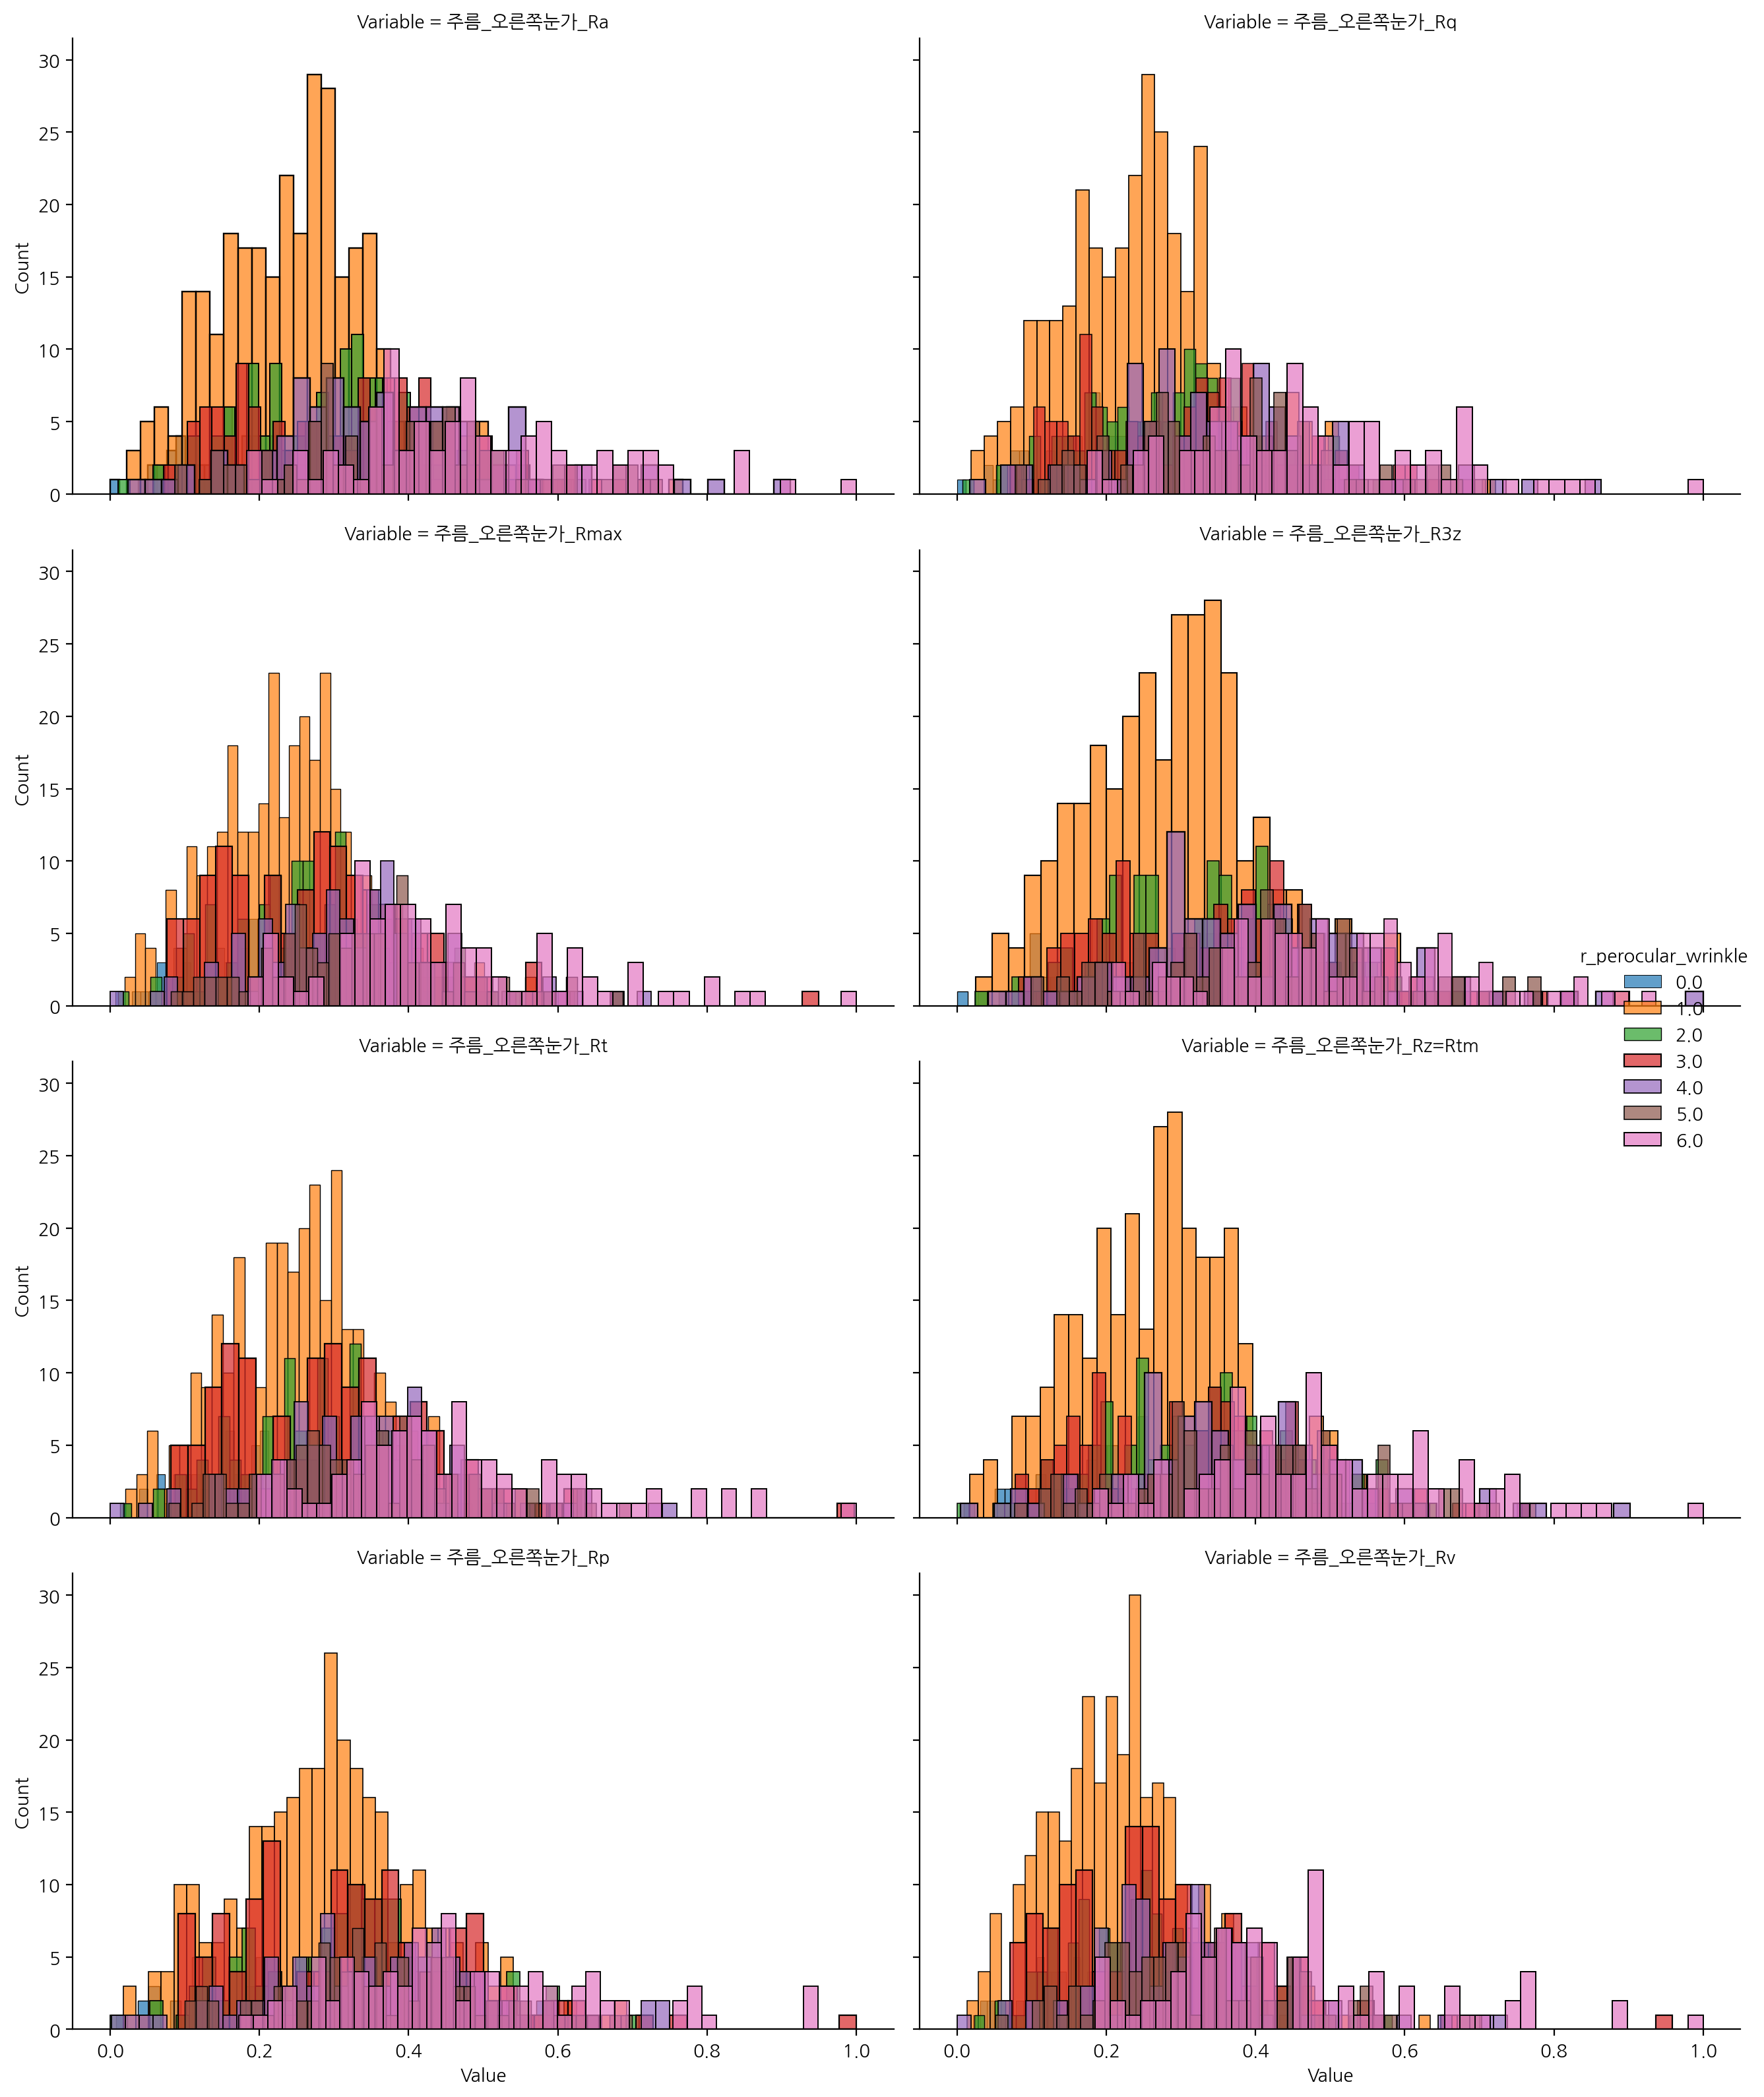

In [72]:
show_histogram(minmax_r_perocular_wrinkle.iloc[:, 1:], 'r_perocular_wrinkle')

<Axes: >

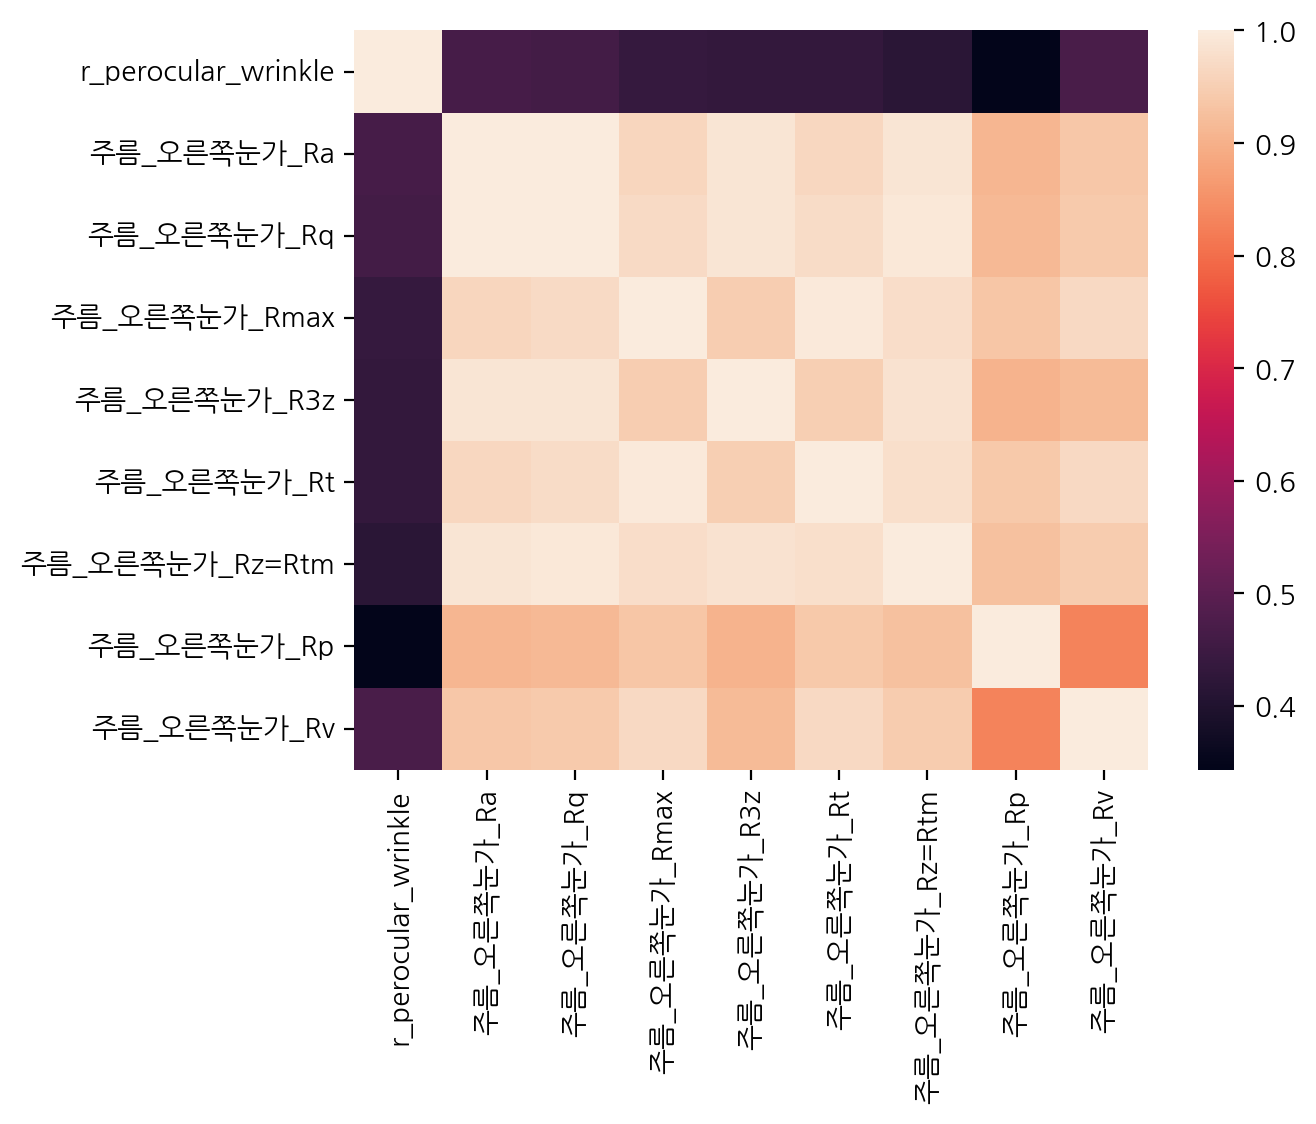

In [73]:
sns.heatmap(data=minmax_r_perocular_wrinkle.iloc[:, 1:].corr(method='spearman'))

# 혹시 모르니..
* 이마 - 수분/탄력 측정 데이터 와 이마 - 주름 등급 데이터 비교해보기

In [ ]:
forehead_wrinkle = annotation[['ID', 'forehead_wrinkle']].merge(keyword_df(measurement, '이마'), on='ID')
print(forehead_wrinkle.shape)
forehead_wrinkle.head(2)

(965, 17)


,ID,forehead_wrinkle,수분_이마,탄력_이마_R0,탄력_이마_R1,탄력_이마_R2,탄력_이마_R3,탄력_이마_R4,탄력_이마_R5,탄력_이마_R6,탄력_이마_R7,탄력_이마_R8,탄력_이마_R9,탄력_이마_Q0,탄력_이마_Q1,탄력_이마_Q2,탄력_이마_Q3
0,1,3.0,53.0,0.167,0.058,0.6527,0.208,0.085,0.7647,0.9647,0.3892,0.109,0.041,33.4,0.5886,0.4777,0.1109
1,2,1.0,75.0,0.287,0.097,0.6620,0.329,0.135,0.5517,0.6494,0.3345,0.190,0.042,57.4,0.5792,0.4375,0.1417


In [ ]:
forehead_wrinkle.describe()

,ID,forehead_wrinkle,수분_이마,탄력_이마_R0,탄력_이마_R1,탄력_이마_R2,탄력_이마_R3,탄력_이마_R4,탄력_이마_R5,탄력_이마_R6,탄력_이마_R7,탄력_이마_R8,탄력_이마_R9,탄력_이마_Q0,탄력_이마_Q1,탄력_이마_Q2,탄력_이마_Q3
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,553.368912,2.245596,60.314073,0.247551,0.097172,0.601260,0.280325,0.137042,0.523762,0.639709,0.319759,0.150763,0.033240,49.439378,0.530091,0.405293,0.124819
std,317.429021,1.499237,9.741275,0.061268,0.032228,0.106454,0.061478,0.038886,0.119333,0.178000,0.066698,0.053601,0.008014,12.246755,0.097834,0.077902,0.035941
min,1.000000,0.000000,24.670000,0.087000,0.010000,0.300000,0.117000,0.021000,0.240000,0.182300,0.140000,0.045000,0.006000,17.400000,0.270000,0.190000,0.040000
25%,281.000000,1.000000,54.000000,0.204000,0.075000,0.530000,0.237000,0.110000,0.440000,0.520000,0.270000,0.110000,0.030000,40.800000,0.460000,0.350000,0.100000
50%,559.000000,2.000000,60.670000,0.240000,0.090000,0.600000,0.273000,0.130000,0.520000,0.630600,0.320000,0.140000,0.030000,48.000000,0.530000,0.407900,0.120000
75%,826.000000,3.000000,66.670000,0.280000,0.114000,0.670000,0.310000,0.160000,0.606400,0.750000,0.368400,0.175000,0.040000,56.000000,0.595500,0.452800,0.142300
max,1100.000000,6.000000,94.330000,0.480000,0.240000,0.980000,0.530000,0.310000,0.917800,1.260000,0.540000,0.435000,0.077000,95.600000,0.850000,0.720000,0.380000


In [ ]:
# 등급별로 mean값 확인
forehead_wrinkle.iloc[:, 1:].groupby('forehead_wrinkle').mean()

,수분_이마,탄력_이마_R0,탄력_이마_R1,탄력_이마_R2,탄력_이마_R3,탄력_이마_R4,탄력_이마_R5,탄력_이마_R6,탄력_이마_R7,탄력_이마_R8,탄력_이마_R9,탄력_이마_Q0,탄력_이마_Q1,탄력_이마_Q2,탄력_이마_Q3
forehead_wrinkle,,,,,,,,,,,,,,,
0.0,60.060769,0.229103,0.075385,0.670018,0.258821,0.109667,0.642321,0.660464,0.388359,0.153974,0.029718,45.764103,0.602226,0.481651,0.120831
1.0,61.032938,0.241085,0.087890,0.627553,0.273463,0.125054,0.562091,0.636513,0.344305,0.153647,0.032774,48.141808,0.557293,0.432474,0.124737
2.0,60.946810,0.247250,0.095664,0.601881,0.281246,0.136409,0.526218,0.642146,0.322172,0.152060,0.034297,49.449138,0.532133,0.407973,0.124634
3.0,59.775312,0.247281,0.100400,0.586642,0.280044,0.143269,0.496561,0.650266,0.299733,0.147069,0.033638,49.336250,0.512265,0.385364,0.126901
4.0,59.692763,0.259539,0.114711,0.555554,0.291921,0.157066,0.464786,0.645364,0.281816,0.145355,0.032908,51.847368,0.484011,0.360254,0.123236
5.0,56.881695,0.263966,0.119136,0.545956,0.297661,0.158949,0.444300,0.637144,0.269954,0.145169,0.034034,52.613559,0.473954,0.348542,0.124563
6.0,59.081556,0.275156,0.126956,0.533307,0.306889,0.173667,0.407336,0.590580,0.255353,0.148200,0.032622,54.920000,0.457862,0.332816,0.125491
